<a href="https://colab.research.google.com/github/PouyaMotieNoparvar/MachinLearningForCropTraitPrediction/blob/master/everimpact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Data Inspections

In [ ]:
pip install geopandas

In [ ]:
pip install geoplot

In [ ]:
pip install Basemap

In [130]:
import geopandas as gpd
import pandas as pd
import shapely.geometry
import shapely.wkt
import geoplot
import geoplot.crs as gcrs
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = gpd.read_file('forest_inventory.geojson')

In [ ]:
print(data)

In [72]:
cs = pd.read_csv('CSV.csv')

In [73]:
cs =pd.DataFrame(cs)

In [ ]:
print(cs)

In [ ]:
data['geometry'].iloc[2]

In [ ]:
data.crs

In [ ]:
print(type(data))

In [ ]:
data['geometry'].head()

In [17]:
# Let's take a copy of our layer
data_proj = data.copy()

# Reproject the geometries by replacing the values with projected ones
data_proj = data_proj.to_crs(epsg=4326)


In [23]:
#area=data.area

In [ ]:
#cs = cs.assign(area=area)

In [42]:
#cs.to_csv('cs_area.csv')

In [43]:
#cs_area = pd.read_csv('cs_area.csv')

In [75]:
area_column = cs['area (m2)']
Sequestration = cs['CS KGCO2/Area']

In [76]:
data_proj=data_proj.assign(area_column=area_column)
data_proj=data_proj.assign(sequestration=Sequestration)

In [77]:
data_proj

,fid,DN,layer,path,age,geometry,area_column,sequestration
0,1,8,Bamboo,C:\Users\Lorenzo\Desktop\Forest Inventory Vect...,81-90,"POLYGON ((141.40079 38.57219, 141.40079 38.572...",392.905971,95008.00337
1,2,6,Bamboo,C:\Users\Lorenzo\Desktop\Forest Inventory Vect...,51-60,"POLYGON ((141.40108 38.57219, 141.40108 38.572...",196.452991,41989.82311
2,3,7,Bamboo,C:\Users\Lorenzo\Desktop\Forest Inventory Vect...,1-10,"POLYGON ((141.40079 38.57204, 141.40079 38.571...",589.360112,134699.01980
3,4,4,Bamboo,C:\Users\Lorenzo\Desktop\Forest Inventory Vect...,11-20,"POLYGON ((141.40122 38.57190, 141.40122 38.571...",196.453763,34831.93970
4,5,8,Bamboo,C:\Users\Lorenzo\Desktop\Forest Inventory Vect...,81-90,"POLYGON ((141.40136 38.57190, 141.40136 38.571...",196.453767,47504.19065
...,...,...,...,...,...,...,...,...
8967,548,5,Red Pine,C:\Users\Lorenzo\Desktop\Forest Inventory Vect...,61-80,"POLYGON ((141.32410 38.51887, 141.32424 38.518...",1769.353706,232753.87970
8968,549,6,Red Pine,C:\Users\Lorenzo\Desktop\Forest Inventory Vect...,51-60,"POLYGON ((141.32353 38.51830, 141.32353 38.518...",196.595764,28072.97074
8969,550,5,Red Pine,C:\Users\Lorenzo\Desktop\Forest Inventory Vect...,61-80,"POLYGON ((141.32367 38.51830, 141.32367 38.518...",196.595767,25861.66203
8970,551,5,Red Pine,C:\Users\Lorenzo\Desktop\Forest Inventory Vect...,61-80,"POLYGON ((141.32339 38.51815, 141.32339 38.518...",196.596143,25861.71151


In [ ]:
#f=data_proj.to_json()

In [ ]:
#data_proj.to_file('epsg4326_jason')

In [ ]:
#print(data_proj)

In [24]:
data_proj.total_bounds

array([141.30000768,  38.51701254, 141.41191003,  38.59114741])

In [25]:
from IPython.core.display import GeoJSON
#save the dataframe as Geojson file

In [ ]:
data_proj['geometry'].head()

<Axes: >

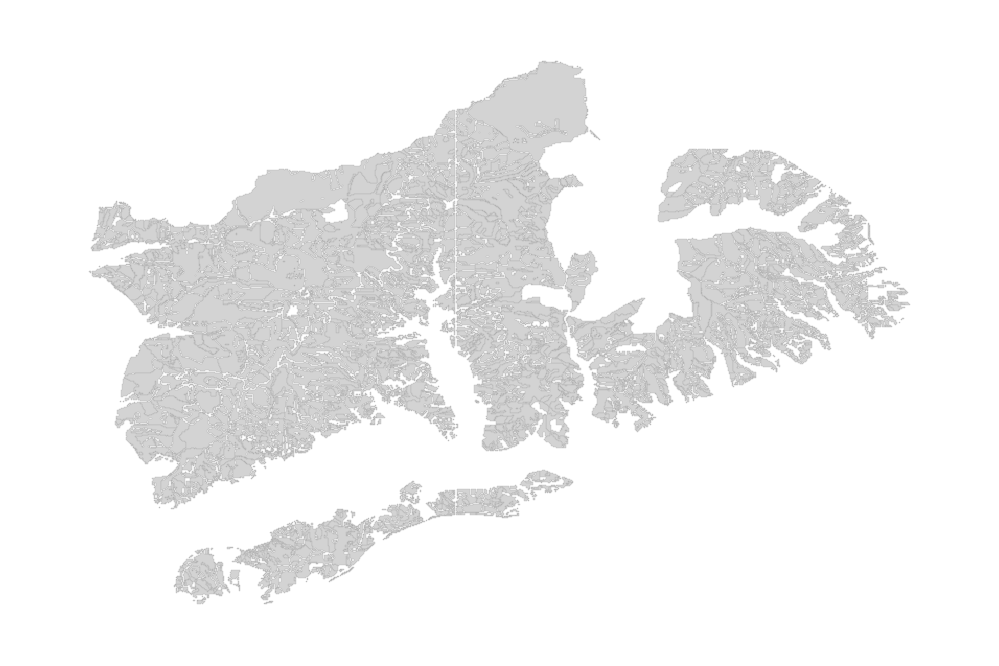

In [27]:
geoplot.polyplot(data_proj, edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3, figsize=(18, 12))

Text(0.5, 1.0, 'Land Cover map for the Polygons')

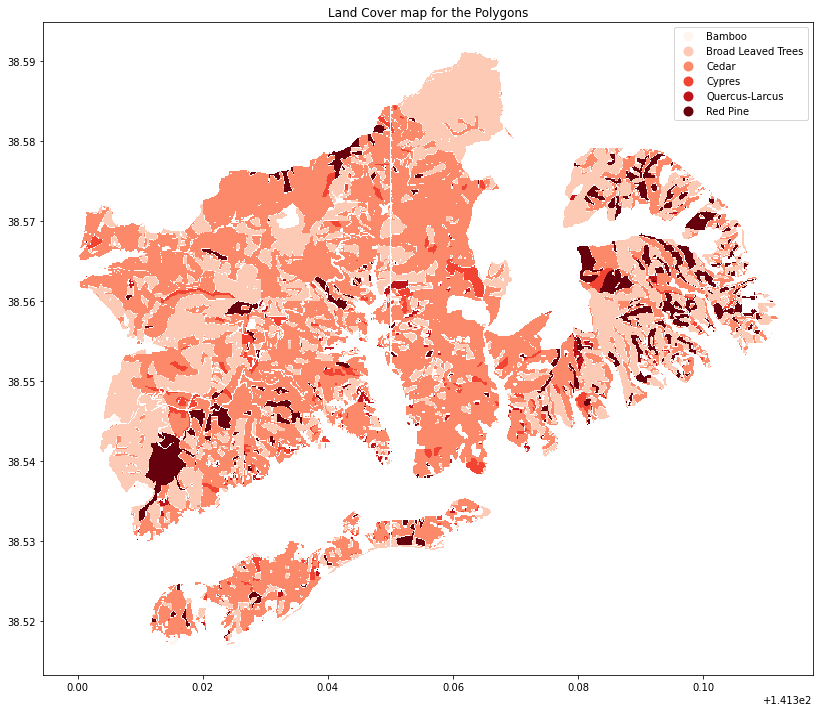

In [48]:
data_proj.plot(column='layer', cmap='Reds', legend=True, figsize=(18, 12));
plt.title ("Land Cover map for the Polygons")

Text(0.5, 1.0, 'tree age map for the Polygons')

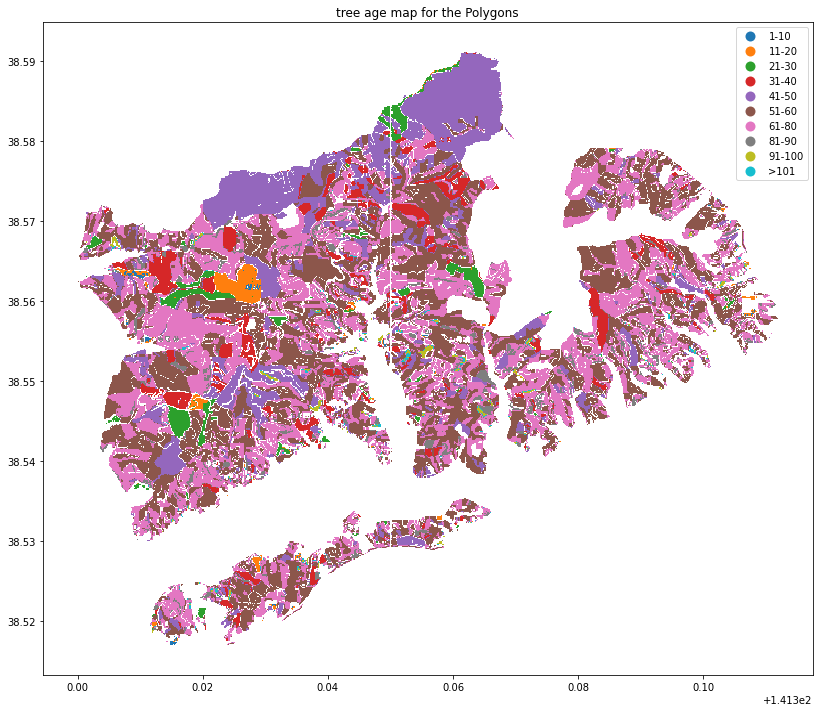

In [49]:
data_proj.plot(column='age', legend=True, figsize=(18, 12));
plt.title ("tree age map for the Polygons")

Text(0.5, 1.0, 'Digital Number (PALSAR) for the Polygons')

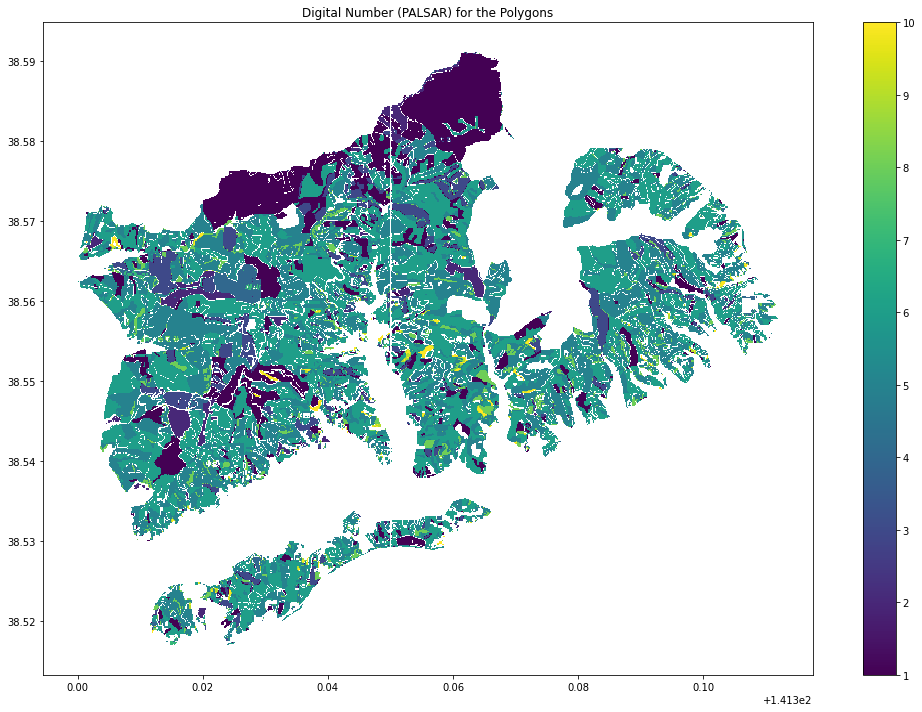

In [50]:
data_proj.plot(column='DN', legend=True, figsize=(18, 12));
plt.title ("Digital Number (PALSAR) for the Polygons")

# Carbon Sequestration in each polygon is depicted



Text(0.5, 1.0, 'Carbon Sequestration (KG CO2 per Polygon)')

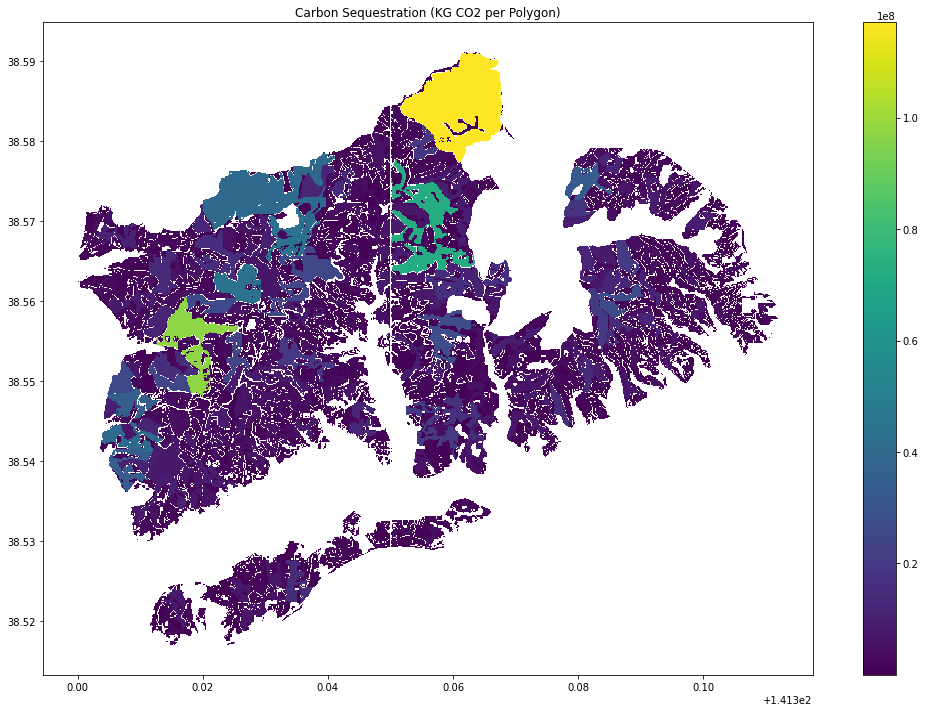

In [104]:
ax = data_proj.plot(column='sequestration', legend=True, figsize=(18, 12));
plt.title ("Carbon Sequestration (KG CO2 per Polygon)")

In [94]:
import contextily as cx
import xyzservices.providers as xyz
import matplotlib.pyplot as plt


In [79]:
data_proj['sequestration'].sum()

4131868719.902918

In [80]:
data_proj['area_column'].sum()

28413028.7758668

# **Over All 4,131,868,719 Kg CO2 (4.131M Tones) was sequestered in the 28413028 m2 (2841 ha) during the past 100 years**

===14.54 Tone / ha / Year

# Optimization By ML

In [81]:
    from sklearn import decomposition, datasets
    from sklearn import tree
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler

linear model

In [105]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('MLdataset.csv')

In [144]:
np.random.seed(0)
plt.style.use('ggplot')

In [166]:
X=np.array(dataset['DN'])
Y=np.array(dataset['kgCS/in_dedicated_area'])
Z=np.array(dataset['age mean'])
A=np.array(dataset['layer'])

In [167]:
X.shape

(8972,)

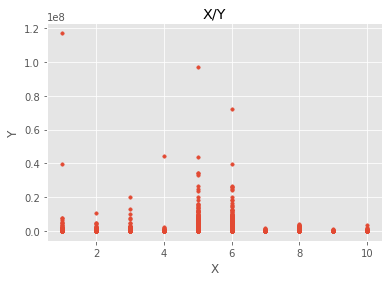

In [170]:
# Visualizing Created Dataset
plt.scatter(X, Y, s=12)
plt.title('X/Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [176]:
trX = X[:6500]
trY = Y[:6500]
teX = X[6500:]
teY = Y[6500:]

In [178]:
def LinearModel(P:np.ndarray, X:np.ndarray):
    Yh = P[0] + P[1]*X
    return Yh

In [171]:
def Loss(P:np.ndarray, Model, X:np.ndarray, Y:np.ndarray):
    Yh = Model(P, X)
    E = np.subtract(Y, Yh) # Error
    SE = np.power(E, 2) # Squared Error
    MSE = np.mean(SE) # Mean Squared Error
    print(f'MSE: {MSE}')
    return MSE

In [173]:
nP = 8973 # Parameters Count

In [174]:
P0 = np.random.uniform(-1, +1, nP)

In [ ]:
Result = opt.minimize(Loss, P0, args=(LinearModel, trX, trY), method='slsqp', options={'maxiter':20})

In [180]:
P = Result['x']

In [181]:
trLoss = Loss(P, LinearModel, trX, trY)
teLoss = Loss(P, LinearModel, teX, teY)

print(f'{trLoss = }')
print(f'{teLoss = }')

MSE: 8396319531500.44
MSE: 1164560962849.5432
trLoss = 8396319531500.44
teLoss = 1164560962849.5432


In [182]:
trPred = LinearModel(P, trX)
tePred = LinearModel(P, teX)

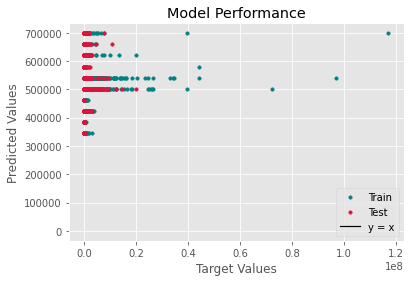

In [185]:
# Visualizing Model Performance
plt.scatter(trY, trPred, s=12, c='teal', label='Train')
plt.scatter(teY, tePred, s=12, c='crimson', label='Test')
plt.plot([-5, +3], [-5, +3], ls='-', lw=1.2, c='k', label='y = x')
plt.title('Model Performance')
plt.xlabel('Target Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [186]:
def R2(Y:np.ndarray, Yh:np.ndarray):
    e = np.subtract(Y, Yh)
    se = np.power(e, 2)
    mse = np.mean(se)
    var = np.var(Y)
    r2 = 1 - mse / var
    return r2

In [187]:
trR2 = R2(trY, trPred)
teR2 = R2(teY, tePred)

print(f'{trR2 = }')
print(f'{teR2 = }')

trR2 = 0.0010017056969605642
teR2 = -0.06053069909399067


non linear model

In [188]:
def ExponentialModel(P:np.ndarray, X:np.ndarray):
    Yh = P[0] + np.exp(P[1]*X + P[2])
    return Yh

In [189]:
nP = 3 # Parameters Count
P0 = np.random.uniform(-1, +1, nP)
Result = opt.minimize(Loss, P0, args=(ExponentialModel, trX, trY), method='slsqp', options={'maxiter':20})

print(Result)

P = Result['x']

trPred = ExponentialModel(P, trX)
tePred = ExponentialModel(P, teX)

trLoss = Loss(P, ExponentialModel, trX, trY)
teLoss = Loss(P, ExponentialModel, teX, teY)

print(f'{trLoss = }')
print(f'{teLoss = }')

trR2 = R2(trY, trPred)
teR2 = R2(teY, tePred)

print(f'{trR2 = }')
print(f'{teR2 = }')

MSE: 8671361911327.764
MSE: 8671361911327.749
MSE: 8671361911327.621
MSE: 8671361911327.736
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: 1.8599617611042987e+83
MSE: 8670547914087.738
MSE: 8670547914087.723
MSE: 8670547914000.59
MSE: 8670547914075.873
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: 6.896301343687741e+277
MSE: 1.3112125672042149e+34
MSE: 1.3112125672042149e+34
MSE: 1.311212957937218e+34
MSE: 1.311212606281395e+34
MSE: 8649594061406.284
MSE: 2.3276163811189342e+20
MSE: 1.0347049909020099e+27
MSE: 2.1609264386889377e+30
MSE: 2.1609264386889377e+30
MSE: 2.1609270825418808e+30
MSE: 2.1609265030895649e+30
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: inf
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
MSE: nan
M

<ipython-input-188-ff246e6d5e04>:2: RuntimeWarning: overflow encountered in exp
  Yh = P[0] + np.exp(P[1]*X + P[2])
<ipython-input-171-d552022c8c72>:4: RuntimeWarning: overflow encountered in power
  SE = np.power(E, 2) # Squared Error
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


MSE: nan
MSE: nan
MSE: nan
MSE: nan
 message: Iteration limit reached
 success: False
  status: 9
     fun: nan
       x: [       nan        nan        nan]
     nit: 20
     jac: [       nan        nan        nan]
    nfev: 275
    njev: 20
MSE: nan
MSE: nan
trLoss = nan
teLoss = nan
trR2 = nan
teR2 = nan


as non ordinal categorical data

In [ ]:
pip install category_encoders

In [119]:
import pandas as pd
import sklearn
import category_encoders as ce
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor


In [5]:
dataset=pd.DataFrame(dataset)

In [6]:
dataset.head

<bound method NDFrame.head of       Column1 Column1.type  fid  DN     layer     age  \
0           0      Feature    1   8    Bamboo   81-90   
1           1      Feature    2   6    Bamboo   51-60   
2           2      Feature    3   7    Bamboo    0-10   
3           3      Feature    4   4    Bamboo  20-Nov   
4           4      Feature    5   8    Bamboo   81-90   
...       ...          ...  ...  ..       ...     ...   
8967     8967      Feature  548   5  Red Pine   61-80   
8968     8968      Feature  549   6  Red Pine   51-60   
8969     8969      Feature  550   5  Red Pine   61-80   
8970     8970      Feature  551   5  Red Pine   61-80   
8971     8971      Feature  552   6  Red Pine   51-60   

      backscattering intensity   Volum(m3/ha)  age mean  biomass(kg/ha)  \
0                     18.061800   2329.016797        85    1.432345e+06   
1                     15.563025   2058.668483        55    1.266081e+06   
2                     16.901961   2201.327149         3    1

In [8]:
ce_OHE = ce.OneHotEncoder(cols=['layer','age'])

data1 = ce_OHE.fit_transform(dataset)
data1.head()

,Column1,Column1.type,fid,DN,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,...,age_10,age_11,backscattering intensity,Volum(m3/ha),age mean,biomass(kg/ha),C kg/ha,Kg of Sequestered CO2 per ha,area,kgCS/in_dedicated_area
0,0,Feature,1,8,1,0,0,0,0,0,...,0,0,18.061800,2329.016797,85,1432345.330,658878.8519,"2,418,085",392.905971,95008.00337
1,1,Feature,2,6,1,0,0,0,0,0,...,0,0,15.563025,2058.668483,55,1266081.117,582397.3139,"2,137,398",196.452991,41989.82311
2,2,Feature,3,7,1,0,0,0,0,0,...,0,0,16.901961,2201.327149,3,1353816.196,622755.4503,"2,285,513",589.360112,134699.01980
3,3,Feature,4,4,1,0,0,0,0,0,...,0,0,12.041200,1707.725944,15,1050251.456,483115.6695,"1,773,035",196.453763,34831.93970
4,4,Feature,5,8,1,0,0,0,0,0,...,0,0,18.061800,2329.016797,85,1432345.330,658878.8519,"2,418,085",196.453767,47504.19065


In [ ]:
ce_be1 = ce.BinaryEncoder(cols=['layer']);

# transform the data
layer_x1 = ce_be1.fit_transform(dataset["layer"]);
layer_x1

sklearn

In [55]:
ce_be = ce.BinaryEncoder(cols=['age']);

# transform the data
age_x2 = ce_be.fit_transform(dataset["age"]);


independent variables

In [63]:
age_x2=pd.DataFrame(age_x2)
age_x2.to_csv('age_x2.csv')

In [64]:
layer_x1=pd.DataFrame(layer_x1)
layer_x1.to_csv('layer_x1.csv')

In [29]:
#layer_x1=layer_x1.values.tolist()

In [30]:
#age_x2=age_x2.values.tolist()

In [65]:
DN_x3=pd.DataFrame(dataset['DN'])
DN_x3.to_csv('DN_x3.csv')

In [33]:
#DN_x3=DN_x3.values.tolist()

In [66]:
area_x4=pd.DataFrame(dataset['area'])
area_x4.to_csv('area_x4.csv')

In [35]:
#area_x4=area_x4.values.tolist()

dependent variable

In [79]:
X =pd.read_csv('X.csv')

In [ ]:
#target = ce.BinaryEncoder(cols=['kgCS/in_dedicated_area']);

# transform the data
#target = target.fit_transform(dataset["kgCS/in_dedicated_area"]);
#target

In [98]:
#target=target.values.tolist()

In [111]:
target=dataset['kgCS/in_dedicated_area']

# decission trees
extra trees regrresor

In [39]:
from sklearn.model_selection import train_test_split


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.25, random_state = 0)

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
from sklearn.svm import SVC
from sklearn import tree
extra_tree_model = ExtraTreesRegressor()


In [124]:
extra_tree_model.fit(X_train, y_train)

ExtraTreesRegressor()

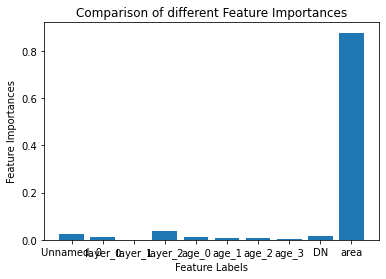

In [131]:
# Computing the importance of each feature
#Feature Importance
feature_importance = extra_tree_model.feature_importances_
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()


In [139]:
# evaluate extra trees ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor
# define the model
model = ExtraTreesRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -33425.747 (34903.879)


In [143]:
# extra trees for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
# define the model
model = ExtraTreesRegressor()
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make a single prediction
row = [[1,1,1,1,1,1,1,1,1,1]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 3304175
